# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES. [What is punctuation?]{https://en.wikipedia.org/wiki/English_punctuation}

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!
If you use random embeddings or placeholder embeddings (e.g., everything is 0) this is automatically solved.

If you want to use other techniques: when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general (brief!) description of the task you have addressed and how you have addressed it
* A brief analysis of the data (class distribution, lenght, etc)
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis


# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the correctness of approach/methodology
* 1 point for the handling of OOV terms
* 1 point for the correct implementation of models (they must run and do the right thing)
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

The evaluation will not be based on the performance of the models!

We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. 

# Deliver

* Two files: a pdf file for the report, and a python notebook
* Put the names of the member of the team at the beginning of both files
* What about additional files, for example models or weights? You can upload them in a private cloud and insert the link in the report.
* Please, submit a notebook with clear sections, text boxes, and comments and indications about what is going on in the code. When we do not understand what is going on we get annoyed, when we are annoyed we tend to be more severe in our evaluation.



# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1273064/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.
If we do not reply within 3-4 days, please send it again!

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# Additional notes and FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* For the baseline, it must have only two trainable layers: the BiLSTM and the Dense/FC one. The Dense layer is the "classification head" with softmax activation. You must not add an additional dense layer on top of the baseline. You can use the embedding layer before the BiLSTM, but it must be not trainable.
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.
* For the application of the Dense Layer, it is recommended to use a Time-Distributed Dense. In any case, doing otherwise is NOT considered an error.
* Some examples of things you can analyze in your discussion and error analysis are: the performances on the most frequent classes and the less frequent classes, precision and recall, the confusion tables, specific misclassified samples.
* Punctuation: you must keep the punctuation in the documents, since it may be helpful for the model, you simply must ignore it when you perform the evaluation of the model, not considering the punctuation classes among the ones you use to compute F1 macro score. If you are curious, you can run ADDITIONAL experiments where you remove punctuation to see its impact.

# 1) Import required libraries

In [251]:
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
import tensorflow
import numpy as np
import os
pad_sequences = tensorflow.keras.preprocessing.sequence.pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Dense, TimeDistributed, LSTM, GRU, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from sklearn.metrics import f1_score, classification_report
from typing import List
import pandas as pd
from functools import reduce
from keras import Model
import operator
from keras.callbacks import EarlyStopping
from keras_tuner import Hyperband, HyperParameters
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import keras


seed_value = 0


def show_history(history: keras.callbacks.History):
    """
    Shows training history data stored by the History Keras callback

    :param history: History Keras callback
    """
    history_data = history.history
    print(f"Displaying the following history keys: {history_data.keys()}")

    for key, value in history_data.items():
        if not key.startswith('val'):
            fig, ax = plt.subplots(1, 1)
            ax.set_title(key)
            ax.plot(value)
            if f'val_{key}' in history_data:
                ax.plot(history_data[f'val_{key}'])
            else:
                print(f"Couldn't find validation values for metric: {key}")

            ax.set_ylabel(key)
            ax.set_xlabel('epoch')
            ax.legend(['train', 'val'], loc='best')
    plt.show()

def predict_data(m: Model, x: np.ndarray) -> np.ndarray:
    """
    Inference routine of a given input set of examples

    :param m: Keras built and possibly trained model
    :param x: input set of examples in np.ndarray format

    :return
        predictions: predicted labels in np.ndarray format
    """
    prediction_info = {
        'batch_size': 64,
        'verbose': 0
    }
    return np.argmax(m.predict(x, **prediction_info), axis=2)


def evaluate_model(m: Model, x: np.ndarray, y: np.ndarray):
    """
    Evaluate the given model based on a given input set of examples

    :param m: Keras built and possibly trained model
    :param x: input set of examples in np.ndarray format
    :param y: tag set of examples in np.ndarray format

    :return
        evaluation metrics: loss, accuracy, f1 macro
    """

    l, acc = m.evaluate(x, y, verbose=0)
    tv = np.argmax(y, axis=2).flatten()
    pred = predict_data(m=m, x=x).flatten()
    f1s = f1_score(tv, pred, average='macro')
    return l, acc, f1s


def plot_metrics(hist):
    fig, axs = plt.subplots(1, 2)
    fig.set_figheight(4)
    fig.set_figwidth(9)
    fig.suptitle('Training trends')
    axs[0].plot(hist.history['acc'])
    axs[0].plot(hist.history['val_acc'])
    axs[0].set_title("model accuracy")
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'], loc='best')
    axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))

    axs[1].plot(hist.history['loss'])
    axs[1].plot(hist.history['val_loss'])
    axs[1].set_title("model loss")
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'], loc='best')
    axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()

# 2) Prepare Data

First of all we try to download 'dependency_treebank' as our dataset from NLTK data module.

In [2]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

project_folder = os.path.join(os.getcwd())
dataset_folder = os.path.join(project_folder, "dependency_treebank")

url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"

if not os.path.exists(dataset_folder):
    print('Downloading dataset to :', dataset_folder)
    with urlopen(url) as response:
        zipfile = ZipFile(BytesIO(response.read()))
        zipfile.extractall(path=project_folder)
        print("Done! Dataset downloaded and unzipped to data folder")
else:
    print("The dataset has already been downloaded!")

Done! Dataset downloaded and unzipped to data folder


We need to do some steps before doing our classification task. these steps consists:
1. Preprocessing on data including converting all the words to their lower forms. We did not do other kind of preprocessing like removing stopwords or removing punctuation marks according to the problem definition.
2. splitting documents into sentences as the POS tags of words in each sentence of our dataset have no direct correlation with POS tags of other sentences.
3. Encoding the sentences and tags using Keras Tokenizer.
4. Making two sets: 'no_punc_tags' consisting of unique tags except punctuation tags and 'no_punc_codes' consisting of the integer equivalent of the tags set, for later use during our evaluation process.
5. Pad the sequences to get a fix-sized list of inputs and outputs.
6. structuring a dataframe for training, validation and test sets.
7. And finally loading GloVe embedding and handling the OOV words not presented in the embedding set.

In [3]:
import itertools

tagged_sentences = []
training_size = 0
validation_size = 0
test_size = 0
max_sentence_size = 48
for i in range(1, 200):
    with open(f'dependency_treebank/wsj_{str(i).zfill(4)}.dp') as f:
        tagged_sentences += [[(word, label) for word, label in sentence if word.strip()] for sentence in
                             [list(y) for x, y in itertools.groupby([
                                 list(*
                                      map(
                                          lambda word_label:
                                          (word_label.split()[0].lower(), word_label.split()[1])
                                          if word_label.strip() else [],
                                          [line]
                                      )
                                      ) for line in f.readlines()
                             ], lambda z: z == []) if not x]]
    if i == 100:
        training_size = len(tagged_sentences)
    if i == 150:
        validation_size = len(tagged_sentences) - training_size
    if i == 199:
        test_size = len(tagged_sentences) - (training_size + validation_size)

In [4]:
X = []  # store input sequence
Y = []  # store output sequence
labels = set()
vocabulary = set()

for sentence in tagged_sentences:
    X_sentence = []
    Y_sentence = []
    for entity in sentence:
        word = entity[0]  # entity[0] contains the word
        tag = entity[1]  # entity[1] contains corresponding tag
        vocabulary.add(word.lower())
        labels.add(tag)
        X_sentence.append(word)
        Y_sentence.append(tag)

    X.append(X_sentence)
    Y.append(Y_sentence)

In [5]:
print("Total number of tagged sentences: {}".format(len(X)))
print("Vocabulary size: {}".format(len(vocabulary)))
print("Total number of tags: {}".format(len(labels)))

Total number of tagged sentences: 3914
Vocabulary size: 10947
Total number of tags: 45


###### Encoding X and Y
An important step in preparing the data is to assign integer value to each word so that the words can be fed to the network as numerical values. For this reason, We fit Keras Tokenizer on our entire dataset  and use 'texts_to_sequences' method that basically replaces each word with its corresponding integer value from the word_index dictionary.

We call this phase as encoding that produce X_encoded and Y_encoded as two lists of words and tags represented as numbers respectively.  


In [6]:
word_tokenizer = Tokenizer(filters=None)  # instantiate tokeniser
word_tokenizer.fit_on_texts(X)  # fit tokeniser on data
X_encoded = word_tokenizer.texts_to_sequences(X)  # use the tokeniser to encode input sequence

In [7]:
tag_tokenizer = Tokenizer(filters=None)
tag_tokenizer.fit_on_texts(Y)
Y_encoded = tag_tokenizer.texts_to_sequences(Y)

In [147]:
punctuation_tags = ['$', '``', '.', ',', '#', 'SYM', ':', "''", '-RRB-', '-LRB-']
Y_flattened = reduce(operator.iconcat, Y, [])
no_punc_tags = set(tag.lower() for tag in Y_flattened if tag not in punctuation_tags)
no_punc_codes = set(tag_tokenizer.word_index[tag] for tag in no_punc_tags)
print(no_punc_tags)

{'vb', 'nnp', 'vbz', 'vbn', 'ls', 'rp', 'wrb', 'jjs', 'dt', 'prp', 'fw', 'prp$', 'vbp', 'wp$', 'rb', 'in', 'vbg', 'cd', 'pdt', 'rbs', 'vbd', 'nn', 'cc', 'ex', 'wp', 'wdt', 'nnps', 'nns', 'uh', 'pos', 'jjr', 'rbr', 'to', 'md', 'jj'}


###### Save vocab
Finally, we save the produced vocab as a JSON file in the project directory.

In [10]:
import simplejson as sj
import os

vocab_path = os.path.join(os.getcwd(), 'vocab.json')

print(f"Saving vocabulary to {vocab_path}")
with open(vocab_path, mode='w') as f:
    sj.dump(word_tokenizer.word_index, f, indent=4)
print("Saving completed!")

Saving vocabulary to /home/jupyter/Assign1/vocab.json
Saving completed!


##### Let's Look at first encoded data point

In [11]:
print("** Raw data point **", "\n", "-" * 100, "\n")
print('X: ', X[0], '\n')
print('Y: ', Y[0], '\n')
print()
print("** Encoded data point **", "\n", "-" * 100, "\n")
print('X: ', X_encoded[0], '\n')
print('Y: ', Y_encoded[0], '\n')


** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  ['pierre', 'vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', '29', '.'] 

Y:  ['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.'] 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [5419, 3714, 1, 2005, 78, 316, 1, 39, 2383, 2, 122, 22, 6, 2006, 317, 444, 2007, 3] 

Y:  [3, 3, 7, 9, 5, 6, 7, 20, 12, 4, 1, 2, 4, 6, 1, 3, 9, 8] 



In [12]:
different_length = [1 if len(inp) != len(out) else 0 for inp, out in zip(X_encoded, Y_encoded)]
print("{} sentences have disparate input-output lengths.".format(sum(different_length)))

0 sentences have disparate input-output lengths.


###### Pad sequences

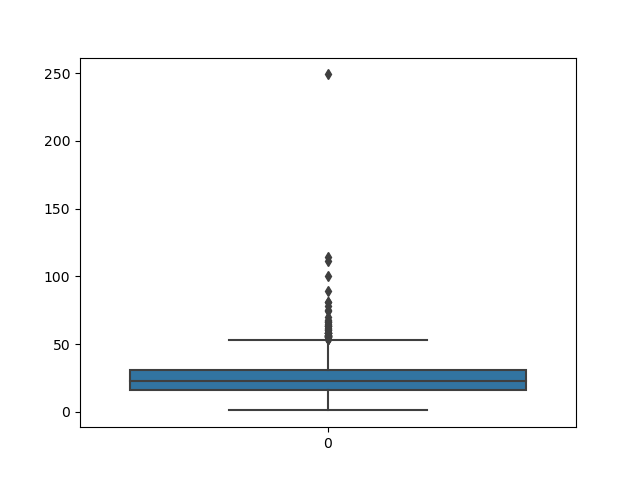

In [14]:
% matplotlib widget

lengths = [len(seq) for seq in X_encoded]
sns.boxplot(lengths)
plt.show()

In [15]:
MAX_SEQ_LENGTH = int(np.quantile(lengths, .999))  # sequences greater than 100 in length will be truncated
print(f"99.9% of the sentences contain {MAX_SEQ_LENGTH} words or fewer.")

99.9% of the sentences contain 89 words or fewer.



In the following we pad each sequence to MAX_SEQ_LENGTH using KERAS' pad_sequences() function. <br> 
 Sentences longer than MAX_SEQ_LENGTH are truncated. Sentences shorter than MAX_SEQ_LENGTH are padded with zeroes.<br> 
 Truncation and padding can either be 'pre' or 'post'.<br>
 For padding we are using 'pre' padding type, that is, add zeroes on the left side.<br>
  For truncation, we are using 'post', that is, truncate a word from right side.

In [16]:
X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")

In [17]:
# print the first sequence
print(X_padded[0], "\n" * 3)
print(Y_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 5419 3714    1 2005   78  316    1   39 2383    2  122   22    6
 2006  317  444 2007    3] 



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3
  3  7  9  5  6  7 20 12  4  1  2  4  6  1  3  9  8]


In [18]:
# assign padded sequences to X and Y
X, Y = X_padded, Y_padded

###### One-hot encoding

In [19]:
# use Keras' to_categorical function to one-hot encode Y
Y = to_categorical(Y)

In [20]:
# Final X and Y shape
print(X.shape)
print(Y.shape)

(3914, 89)
(3914, 89, 46)


###### Split data in training, validation and test sets

In [21]:
X_train = X[:training_size]
y_train = Y[:training_size]
X_val = X[training_size:training_size + validation_size]
y_val = Y[training_size:training_size + validation_size]
X_test = X[training_size + validation_size:]
y_test = Y[training_size + validation_size:]

In [22]:
# print number of samples in each set
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(y_train.shape))
print("-" * 50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_val.shape))
print('Shape of output sequences: {}'.format(y_val.shape))
print("-" * 50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(y_test.shape))

TRAINING DATA
Shape of input sequences: (1963, 89)
Shape of output sequences: (1963, 89, 46)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (1299, 89)
Shape of output sequences: (1299, 89, 46)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (652, 89)
Shape of output sequences: (652, 89, 46)


# Starting vocabulary: V1|GloVe
The next step is to provide word embeddings of the each words in our vocbulary to feed to the network as a pre-trained embedding layer.

In [31]:
glove = {}
with open("../glove.840B.300d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        glove[word] = vector

In [32]:
def check_ovv_terms(embedding_model: dict,
                    word_listing: List[str]):
    """
    Checks differences between pre-trained embedding model vocabulary
    and dataset specific vocabulary in order to highlight out-of-vocabulary terms.

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_listing: dataset specific vocabulary (list)

    :return
        - list of OOV terms
    """
    embedding_vocabulary = set(embedding_model.keys())
    oov = set(word_listing).difference(embedding_vocabulary)
    return list(oov)

In [33]:
oov_terms = check_ovv_terms(glove, word_tokenizer.word_index.keys())
oov_percentage = float(len(oov_terms)) * 100 / len(word_tokenizer.word_index)
print(f"Total OOV terms: {len(oov_terms)} ({oov_percentage:.2f}%)")

Total OOV terms: 653 (5.97%)


# Handling OOV words

Now we proceed on building the embedding matrix, while handling OOV terms at the same time.

## Find terms Out Of Vocabulary V1 (OOV1) of the training, validation and testing splits
Compute embeddings for terms out of vocabulary V1 (OOV1) of the training, validation and testing split and add embeddings to the vocabulary. What we've done here is that first of all we check the existence of the word in GloVe embedding. If it is presented, its embedding vector would be added to our embedding matrix. Otherwise we generate a random value as the embedding vector of that word to be saved in the embedding matrix. Finally for all of the words presented in our dataset, there is an equivalent embedding.

In [34]:
# assign word vectors from Glove model

EMBEDDING_SIZE = 300  # each word in Glove model is represented using a 300 dimensional vector
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1

# create an empty embedding matrix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))

# create a word id to index dictionary mapping
word2id = word_tokenizer.word_index

# copy vectors from word2vec to the words present in corpus
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = glove[word]
    except KeyError:
        embedding_weights[index, :] = np.random.uniform(low=-0.05, high=0.05, size=EMBEDDING_SIZE)

In [35]:
# check embedding dimension
print("Embeddings shape: {}".format(embedding_weights.shape))

Embeddings shape: (10948, 300)


# 3) Designing the networks

In [243]:
NUM_CLASSES = Y.shape[2]

### Hyperparameter tuning
In this step we try to find best configuration of hyper-parameters for each model. Finding best configuration is based on validation set. Each configuration that lead to better result with respect to f1-score is selected as the best setting and will apply to the model to be trained and evaluated on the test set.

In [273]:
def model_bidirect_builder(hp: HyperParameters):
    model = Sequential()
    model.add(Embedding(input_dim=VOCABULARY_SIZE,
                        output_dim=EMBEDDING_SIZE,
                        input_length=MAX_SEQ_LENGTH,
                        weights=[embedding_weights],
                        trainable=False
                        ))

    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(Bidirectional(LSTM(hp_units, return_sequences=True)))
    model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

    hp_learning_rate = hp.Choice('learning_rate', values=[i / 10000 for i in range(330, 340)])
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='categorical_crossentropy',
        metrics=['acc'])

    return model


def model_gru_builder(hp: HyperParameters):
    model = Sequential()
    model.add(Embedding(input_dim=VOCABULARY_SIZE,
                        output_dim=EMBEDDING_SIZE,
                        input_length=MAX_SEQ_LENGTH,
                        weights=[embedding_weights],
                        trainable=False
                        ))

    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(GRU(hp_units, return_sequences=True))
    model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

    hp_learning_rate = hp.Choice('learning_rate', values=[i / 10000 for i in range(330, 340)])
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='categorical_crossentropy',
        metrics=['acc'])

    return model


def model_two_bidirect_builder(hp: HyperParameters):
    model = Sequential()
    model.add(Embedding(input_dim=VOCABULARY_SIZE,
                        output_dim=EMBEDDING_SIZE,
                        input_length=MAX_SEQ_LENGTH,
                        weights=[embedding_weights],
                        trainable=False
                        ))
    hp_units_1 = hp.Int('units', min_value=32, max_value=128, step=32)
    hp_units_2 = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(Bidirectional(LSTM(hp_units_1, return_sequences=True)))
    model.add(Bidirectional(LSTM(hp_units_2, return_sequences=True)))
    model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

    hp_learning_rate = hp.Choice('learning_rate', values=[i / 10000 for i in range(330, 340)])
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='categorical_crossentropy',
        metrics=['acc'])

    return model


def model_two_dense_builder(hp: HyperParameters):
    model = Sequential()
    model.add(Embedding(input_dim=VOCABULARY_SIZE,
                        output_dim=EMBEDDING_SIZE,
                        input_length=MAX_SEQ_LENGTH,
                        weights=[embedding_weights],
                        trainable=False
                        ))

    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(Bidirectional(LSTM(hp_units, return_sequences=True)))
    model.add(TimeDistributed(Dense(NUM_CLASSES, activation='relu')))
    model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

    hp_learning_rate = hp.Choice('learning_rate', values=[i / 10000 for i in range(330, 340)])
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='categorical_crossentropy',
        metrics=['acc'])

    return model

In [275]:
model_bidirect_tuner = Hyperband(model_bidirect_builder,
                                 objective='acc',
                                 max_epochs=50,
                                 factor=3,
                                 overwrite=True,
                                 seed=seed_value,
                                 project_name='bidirect_model',
                                 )
model_gru_tuner = Hyperband(model_gru_builder,
                            objective='acc',
                            max_epochs=50,
                            factor=4,
                            overwrite=True,
                            seed=seed_value,
                            project_name='gru_model',
                            )
model_two_bidirect_tuner = Hyperband(model_two_bidirect_builder,
                                     objective='acc',
                                     max_epochs=50,
                                     factor=4,
                                     overwrite=True,
                                     seed=seed_value,
                                     project_name='two_bidirect_model',
                                     )
model_two_dense_tuner = Hyperband(model_two_dense_builder,
                                  objective='acc',
                                  max_epochs=50,
                                  factor=4,
                                  overwrite=True,
                                  seed=seed_value,
                                  project_name='two_dense_model',
                                  )
stop_early = EarlyStopping(monitor='val_acc', patience=3)
training_info = {
    'verbose': 1,
    'epochs': 50,
    'batch_size': 64,
    'callbacks': [stop_early]
}

In [272]:
print("Tuning model_bidirect:")
model_bidirect_tuner.search(X_train, y_train, validation_data=(X_val, y_val), **training_info)

Trial 6 Complete [00h 00m 12s]
acc: 0.9762230515480042

Best acc So Far: 0.9792624115943909
Total elapsed time: 00h 01m 21s
INFO:tensorflow:Oracle triggered exit


In [276]:
print("Tuning model_gru:")
model_gru_tuner.search(X_train, y_train, validation_data=(X_val, y_val), callbacks=[stop_early])

Trial 3 Complete [00h 00m 20s]
acc: 0.9859879612922668

Best acc So Far: 0.986297070980072
Total elapsed time: 00h 01m 02s
INFO:tensorflow:Oracle triggered exit


In [277]:
print("Tuning model_two_bidirect:")
model_two_bidirect_tuner.search(X_train, y_train, validation_data=(X_val, y_val), callbacks=[stop_early])

Trial 3 Complete [00h 00m 44s]
acc: 0.9842193126678467

Best acc So Far: 0.9882088303565979
Total elapsed time: 00h 02m 08s
INFO:tensorflow:Oracle triggered exit


In [278]:
print("Tuning model_two_dense:")
model_two_dense_tuner.search(X_train, y_train, validation_data=(X_val, y_val), callbacks=[stop_early])

Trial 3 Complete [00h 00m 24s]
acc: 0.988317608833313

Best acc So Far: 0.9907330274581909
Total elapsed time: 00h 01m 15s
INFO:tensorflow:Oracle triggered exit


In [310]:
bidirect_best_hps = model_bidirect_tuner.get_best_hyperparameters(num_trials=1)[0]
gru_best_hps = model_gru_tuner.get_best_hyperparameters(num_trials=1)[0]
two_bidirect_best_hps = model_two_bidirect_tuner.get_best_hyperparameters(num_trials=1)[0]
two_dense_best_hps = model_two_dense_tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""Model Bidirect LSTM
The optimal number of units in the first Bi_directional  LSTM layer is \
{bidirect_best_hps.get('units')} and the optimal\nlearning rate for the optimizer is {bidirect_best_hps.get('learning_rate')}.""")
print()
print(f"""Model GRU
The optimal number of units in the first GRU layer is \
{gru_best_hps.get('units')} and the optimal learning\nrate for the optimizer is {gru_best_hps.get('learning_rate')}.""")
print()
print(f"""Model with 2 Bidirect LSTM
The optimal number of units in the first Bi_directional LSTM layer is \
{two_bidirect_best_hps.get('units1')} and in\nthe second layer is {two_bidirect_best_hps.get('units2')} and \
the optimal learning rate for the optimizer is {two_bidirect_best_hps.get('learning_rate')}.
""")
print()
print(f"""Model with 2 dense layers
The optimal number of units in the first Bi_directional  LSTM layer is \
{two_dense_best_hps.get('units')} and the optimal\nlearning rate for the optimizer is {two_dense_best_hps.get('learning_rate')}.
""")

Model Bidirect LSTM
The optimal number of units in the first Bi_directional  LSTM layer is 96 and the optimal
learning rate for the optimizer is 0.0333.

Model GRU
The optimal number of units in the first GRU layer is 64 and the optimal learning
rate for the optimizer is 0.0334.

Model with 2 Bidirect LSTM
The optimal number of units in the first Bi_directional LSTM layer is 64 and in
the second layer is 64 and the optimal learning rate for the optimizer is 0.0333.


Model with 2 dense layers
The optimal number of units in the first Bi_directional  LSTM layer is 64 and the optimal
learning rate for the optimizer is 0.0332.



# create architectures

### 1. Baseline model

In [280]:
bidirect_model = model_bidirect_tuner.hypermodel.build(bidirect_best_hps)
bidirect_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 89, 300)           3284400   
                                                                 
 bidirectional_1 (Bidirectio  (None, 89, 192)          304896    
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, 89, 46)           8878      
 tributed)                                                       
                                                                 
Total params: 3,598,174
Trainable params: 313,774
Non-trainable params: 3,284,400
_________________________________________________________________


In [281]:
bidirect_training = bidirect_model.fit(X_train, y_train, validation_data=(X_val, y_val), **training_info)

Epoch 1/50
31/31 [==============================] - 8s 171ms/step - loss: 0.4673 - acc: 0.8949 - val_loss: 0.1208 - val_acc: 0.9644
Epoch 2/50
31/31 [==============================] - 4s 142ms/step - loss: 0.0787 - acc: 0.9769 - val_loss: 0.0814 - val_acc: 0.9756
Epoch 3/50
31/31 [==============================] - 4s 142ms/step - loss: 0.0449 - acc: 0.9868 - val_loss: 0.0705 - val_acc: 0.9789
Epoch 4/50
31/31 [==============================] - 4s 142ms/step - loss: 0.0299 - acc: 0.9912 - val_loss: 0.0707 - val_acc: 0.9794
Epoch 5/50
31/31 [==============================] - 4s 142ms/step - loss: 0.0207 - acc: 0.9940 - val_loss: 0.0724 - val_acc: 0.9795
Epoch 6/50
31/31 [==============================] - 4s 141ms/step - loss: 0.0148 - acc: 0.9958 - val_loss: 0.0709 - val_acc: 0.9808
Epoch 7/50
31/31 [==============================] - 4s 146ms/step - loss: 0.0111 - acc: 0.9969 - val_loss: 0.0739 - val_acc: 0.9807
Epoch 8/50
31/31 [==============================] - 4s 139ms/step - loss: 0.

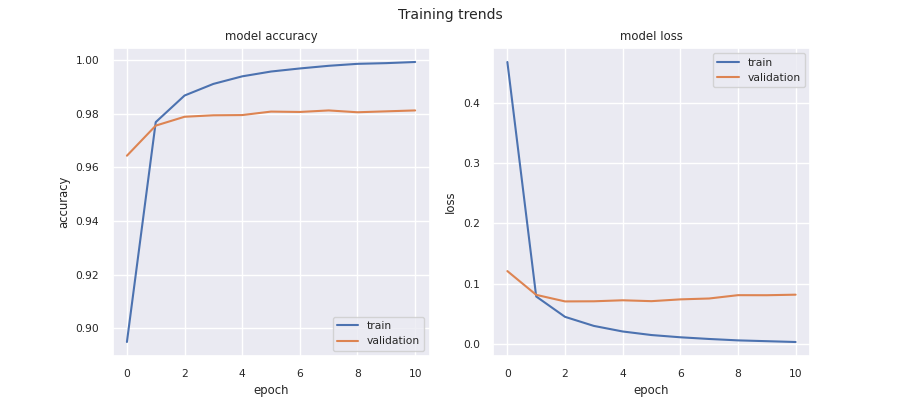

In [292]:
plot_metrics(bidirect_training)

### 2. GRU model

In [283]:
gru_model = model_gru_tuner.hypermodel.build(gru_best_hps)
gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 89, 300)           3284400   
                                                                 
 gru (GRU)                   (None, 89, 64)            70272     
                                                                 
 time_distributed_3 (TimeDis  (None, 89, 46)           2990      
 tributed)                                                       
                                                                 
Total params: 3,357,662
Trainable params: 73,262
Non-trainable params: 3,284,400
_________________________________________________________________


In [284]:
gru_training = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), **training_info)

Epoch 1/50
31/31 [==============================] - 5s 93ms/step - loss: 0.4980 - acc: 0.9251 - val_loss: 0.1360 - val_acc: 0.9627
Epoch 2/50
31/31 [==============================] - 2s 77ms/step - loss: 0.0941 - acc: 0.9738 - val_loss: 0.0941 - val_acc: 0.9730
Epoch 3/50
31/31 [==============================] - 2s 77ms/step - loss: 0.0646 - acc: 0.9817 - val_loss: 0.0823 - val_acc: 0.9755
Epoch 4/50
31/31 [==============================] - 2s 78ms/step - loss: 0.0499 - acc: 0.9853 - val_loss: 0.0797 - val_acc: 0.9773
Epoch 5/50
31/31 [==============================] - 2s 77ms/step - loss: 0.0409 - acc: 0.9877 - val_loss: 0.0788 - val_acc: 0.9776
Epoch 6/50
31/31 [==============================] - 2s 77ms/step - loss: 0.0340 - acc: 0.9900 - val_loss: 0.0794 - val_acc: 0.9775
Epoch 7/50
31/31 [==============================] - 2s 77ms/step - loss: 0.0291 - acc: 0.9915 - val_loss: 0.0807 - val_acc: 0.9777
Epoch 8/50
31/31 [==============================] - 2s 78ms/step - loss: 0.0266 - a

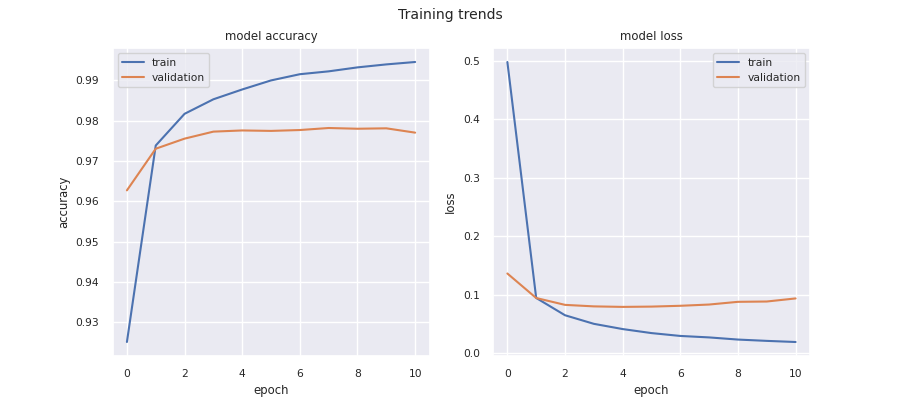

In [285]:
plot_metrics(gru_training)

### 3.  Two bidirectional LSTM

In [286]:
two_bidirect_model = model_two_bidirect_tuner.hypermodel.build(two_bidirect_best_hps)
two_bidirect_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 89, 300)           3284400   
                                                                 
 bidirectional_2 (Bidirectio  (None, 89, 128)          186880    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 89, 128)          98816     
 nal)                                                            
                                                                 
 time_distributed_4 (TimeDis  (None, 89, 46)           5934      
 tributed)                                                       
                                                                 
Total params: 3,576,030
Trainable params: 291,630
Non-trainable params: 3,284,400
______________________________________

In [287]:
two_bidirect_training = two_bidirect_model.fit(X_train, y_train, validation_data=(X_val, y_val), **training_info)

Epoch 1/50
31/31 [==============================] - 14s 246ms/step - loss: 0.9231 - acc: 0.7735 - val_loss: 0.4046 - val_acc: 0.8795
Epoch 2/50
31/31 [==============================] - 6s 188ms/step - loss: 0.2198 - acc: 0.9409 - val_loss: 0.1271 - val_acc: 0.9657
Epoch 3/50
31/31 [==============================] - 6s 187ms/step - loss: 0.0838 - acc: 0.9767 - val_loss: 0.0862 - val_acc: 0.9750
Epoch 4/50
31/31 [==============================] - 6s 188ms/step - loss: 0.0516 - acc: 0.9853 - val_loss: 0.0727 - val_acc: 0.9794
Epoch 5/50
31/31 [==============================] - 6s 188ms/step - loss: 0.0368 - acc: 0.9898 - val_loss: 0.0695 - val_acc: 0.9801
Epoch 6/50
31/31 [==============================] - 6s 189ms/step - loss: 0.0279 - acc: 0.9920 - val_loss: 0.0706 - val_acc: 0.9801
Epoch 7/50
31/31 [==============================] - 6s 187ms/step - loss: 0.0214 - acc: 0.9941 - val_loss: 0.0708 - val_acc: 0.9808
Epoch 8/50
31/31 [==============================] - 6s 188ms/step - loss: 0

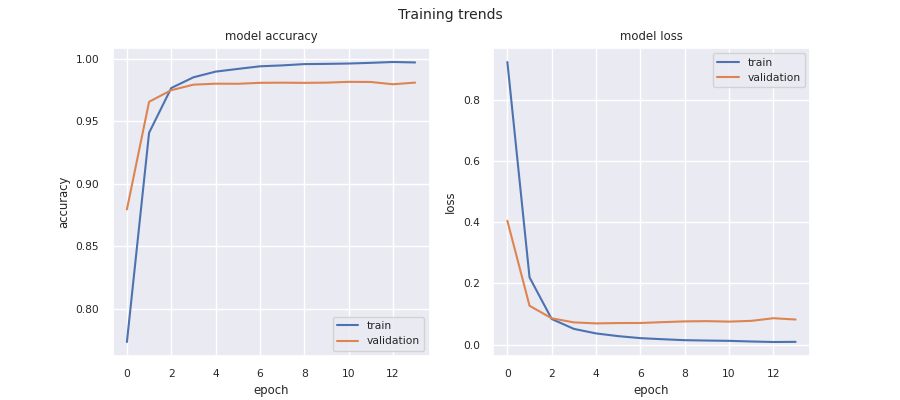

In [288]:
plot_metrics(two_bidirect_training)

### 4. Two Dense layer

In [289]:
two_dense_model = model_two_dense_tuner.hypermodel.build(two_dense_best_hps)
two_dense_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 89, 300)           3284400   
                                                                 
 bidirectional_4 (Bidirectio  (None, 89, 128)          186880    
 nal)                                                            
                                                                 
 time_distributed_5 (TimeDis  (None, 89, 46)           5934      
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, 89, 46)           2162      
 tributed)                                                       
                                                                 
Total params: 3,479,376
Trainable params: 194,976
Non-trainable params: 3,284,400
______________________________________

In [290]:
two_dense_training = two_dense_model.fit(X_train, y_train, validation_data=(X_val, y_val), **training_info)

Epoch 1/50
31/31 [==============================] - 9s 179ms/step - loss: 0.5692 - acc: 0.8755 - val_loss: 0.1325 - val_acc: 0.9633
Epoch 2/50
31/31 [==============================] - 3s 103ms/step - loss: 0.0839 - acc: 0.9761 - val_loss: 0.0795 - val_acc: 0.9771
Epoch 3/50
31/31 [==============================] - 3s 102ms/step - loss: 0.0449 - acc: 0.9868 - val_loss: 0.0728 - val_acc: 0.9791
Epoch 4/50
31/31 [==============================] - 3s 101ms/step - loss: 0.0294 - acc: 0.9913 - val_loss: 0.0737 - val_acc: 0.9809
Epoch 5/50
31/31 [==============================] - 3s 102ms/step - loss: 0.0204 - acc: 0.9939 - val_loss: 0.0744 - val_acc: 0.9813
Epoch 6/50
31/31 [==============================] - 3s 101ms/step - loss: 0.0152 - acc: 0.9953 - val_loss: 0.0788 - val_acc: 0.9814
Epoch 7/50
31/31 [==============================] - 3s 101ms/step - loss: 0.0126 - acc: 0.9961 - val_loss: 0.0872 - val_acc: 0.9807
Epoch 8/50
31/31 [==============================] - 3s 101ms/step - loss: 0.

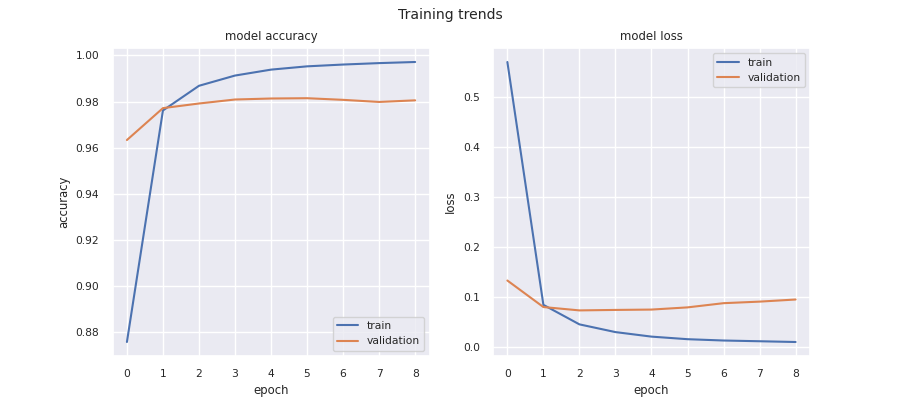

In [291]:
plot_metrics(two_dense_training)

# 4) Evaluate models 
In this step we evaluate each model on the validation set to find the best two ones to use for predicting the test set.<br>
For the evaluation we calculate loss, accuracy and f1-macro score.

In [294]:
models = [bidirect_model,
          gru_model,
          two_bidirect_model,
          two_dense_model]

for i, model in enumerate(models):
    loss, accuracy, f1 = evaluate_model(model, X_val, y_val)
    print('model', i + 1, ':')
    print("Loss: {0} | Accuracy: {1} | F1-Score(Macro): {2:.2f}\n".format(loss, accuracy, f1))

model 1 :
Loss: 0.08166789263486862 | Accuracy: 0.9812561273574829 | F1-Score(Macro): 0.80

model 2 :
Loss: 0.09332690387964249 | Accuracy: 0.9770264029502869 | F1-Score(Macro): 0.78

model 3 :
Loss: 0.08220525830984116 | Accuracy: 0.9810138940811157 | F1-Score(Macro): 0.82

model 4 :
Loss: 0.09454116970300674 | Accuracy: 0.980512261390686 | F1-Score(Macro): 0.79



# 5) Evaluate 2 best models on Test set
Based on the metrics calculated after evaluating four trained models, we can see the `Bidirect_model` model and the `Two_bidirect_model` model are the best two models having `0.80` and `0.82` f1_scores respectively.

In [295]:
def build_classification_report(y_true: np.ndarray,
                                y_pred: np.ndarray):
    """
    Build classification report based on true and predicted labels

    :param y_true: ground truth values of the model
    :param y_pred: tag set of examples in np.ndarray format

    :return
        classification report
    """
    report = classification_report(y_true, y_pred, zero_division=0, output_dict=False,
                                   labels=list(no_punc_codes), target_names=list(no_punc_tags))
    return report


def build_confusion_matrix(y_true: np.ndarray,
                           y_pred: np.ndarray):
    """
    Build confusion matrix based on true and predicted labels

    :param y_true: ground truth values of the model
    :param y_pred: tag set of examples in np.ndarray format

    :return
        confusion matrix
    """
    cf_matrix = confusion_matrix(y_true, y_pred, labels=list(no_punc_codes), normalize='true')
    df_cm = pd.DataFrame(cf_matrix, index=list(no_punc_tags),
                         columns=list(no_punc_tags))  #put the confusion matrix in a pandas dataframe
    fig, ax = plt.subplots(figsize=(9.5, 9.5))
    plt.tight_layout(pad=1.5)
    sns.heatmap(cf_matrix, annot=True, fmt='.1f', xticklabels=no_punc_tags, yticklabels=no_punc_tags
                , annot_kws={"size": 9}, cbar_kws={"shrink": .70, "location": "bottom"})
    sns.set(font_scale=0.7)
    plt.show(block=True)

    return df_cm

In [297]:
true_values = np.argmax(y_test, axis=2).flatten()
predictions = predict_data(m=models[0], x=X_test).flatten()

In [298]:
start = "\033[1m"
end = "\033[0;0m"
print(start, 'Evaluation of best model:\n', end)
report = build_classification_report(true_values, predictions)
print(report)

 Evaluation of best model:
 
              precision    recall  f1-score   support

          vb       0.92      0.91      0.91      2383
         nnp       0.98      0.97      0.97      1630
         vbz       0.89      0.88      0.89      1504
         vbn       0.99      0.99      0.99      1335
          ls       0.92      0.94      0.93       941
          rp       0.82      0.86      0.84       918
         wrb       0.99      0.96      0.98       858
         jjs       0.93      0.94      0.94       634
          dt       0.89      0.88      0.89       381
         prp       0.94      0.95      0.94       403
          fw       0.99      1.00      0.99       366
        prp$       1.00      1.00      1.00       386
         vbp       0.89      0.81      0.85       366
         wp$       0.94      0.97      0.95       280
          rb       0.99      0.99      0.99       192
          in       0.87      0.86      0.86       221
         vbg       0.88      0.88      0.88       13

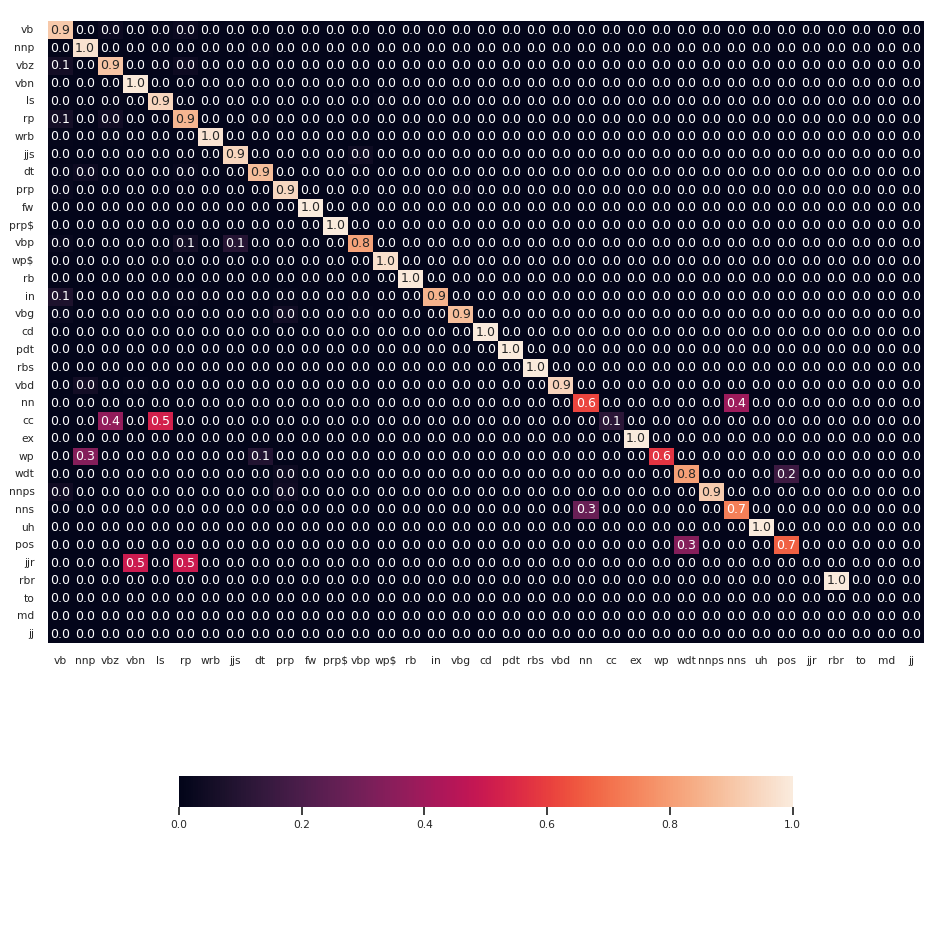

In [299]:
cm_base_model = build_confusion_matrix(true_values, predictions);

In [300]:
print(start, 'Evaluation of best model:\n', end)
predictions = predict_data(m=models[2], x=X_test).flatten()
report = build_classification_report(true_values, predictions)
print(report)

 Evaluation of best model:
 
              precision    recall  f1-score   support

          vb       0.91      0.86      0.89      2383
         nnp       0.97      0.96      0.97      1630
         vbz       0.84      0.82      0.83      1504
         vbn       0.99      0.99      0.99      1335
          ls       0.89      0.92      0.91       941
          rp       0.77      0.83      0.80       918
         wrb       0.98      0.96      0.97       858
         jjs       0.94      0.90      0.92       634
          dt       0.87      0.88      0.88       381
         prp       0.92      0.95      0.93       403
          fw       0.99      1.00      1.00       366
        prp$       1.00      1.00      1.00       386
         vbp       0.80      0.83      0.81       366
         wp$       0.90      0.94      0.92       280
          rb       0.98      1.00      0.99       192
          in       0.83      0.85      0.84       221
         vbg       0.83      0.92      0.87       13

Classification report provides a good overview of the prediction quality of a model on a per-class basis. We excluded punctuation classes from the final evaluation.

To analyse the obtained results of the report, we can consider these four combinations of states: <br>
* <mark>High precision, Low recall:</mark>
In some classes like 'NN' and 'WDT' we got a higher precision than recall. A class with high precision but low recall, returns very few results, but most of its predicted labels are correct when compared to the training labels.

* <mark>Low precision, High recall:</mark> A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. Our model acted well with respect to this problem as we can see there is just one class with low precision and high recall which is 'NNS'.

* <mark>Low precision, Low recall:</mark> As we can see for classes 'TO', 'MD' and 'JJ' both Precision and Recall are equal to Zero. It happens when TP = 0, and as a result F1-score cannot be calculated (division by 0). Such cases can be scored as F1-score = 0, or generally marking the classifier as useless. Because the classifier cannot predict any correct positive result. 

* <mark>High precision, High recall:</mark> An ideal system with high precision and high recall will return many results, with all results labeled correctly. Most of the classes in our model are included in this category. And also for some classes both Precision and Recall is equal to 1 and as a result the f1-score is equal to 1. 'FW', 'RBS', 'RBR' and 'EX' classes are some examples of it.

The two problem reported above ("High precision, Low recall" as well as "Low precision, Low recall") can be as a result of presenting little or no support for these classes in the training set. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

As a whole, the obtained F1-score is coherent with those on the validation set.

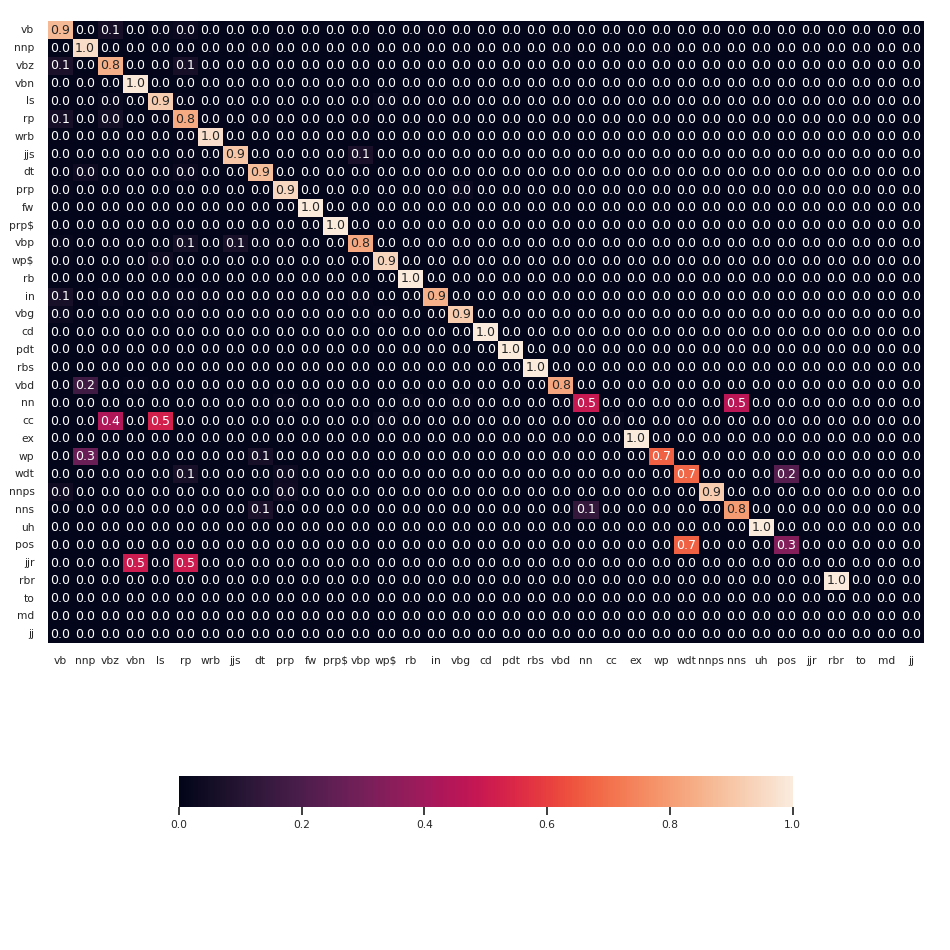

In [305]:
cm_two_bidirect = build_confusion_matrix(true_values, predictions)

By considering the confusion matrix it can be simply understood that our model has problem in classifiying some classes correctly. Here there is some examples of it:<br>
* <mark>'TO', 'MD' and 'JJ':</mark> The classifier failed compeletely in predicting tags related to 'TO', 'Modal verb' and 'Adjective'. It means the classifier couldn't classify these three tags in test set because it has not seen any sample of them in the training set. In other words, our classifier is unable to classify unseen classes.
* <mark>'JJR' ==> 'RP' and 'VBN':</mark> The classifier failed in predicting tags related to 'Comparative adjective' correctly. 50 percent of the 'JJR' tags are predicted as 'Particle' and 50 percent are predicted as 'Past participle'.
* <mark>'NN' ==> 'NNS':</mark> The classifier failed in predicting tags related to 'common noun' correctly. Some of 'NN' tags are predicted as plural common noun. 
* <mark>'WP' ==> 'NNP':</mark> Incorrect prediction of some Wh- pronoun as proper noun. <br>
* <mark>'RP' ==> 'VB':</mark> Incorrect prediction of some particles as base verb. <br>
* <mark>'CC' ==> 'VBZ' and 'Ls':</mark> Incorrect prediction of some Coordinating conjunctions as Present 3rd person singular and List item marker.


In order to see the errors of classifier in each class in more detail we build a dictionary of the errors using the information obtained from confusion_matrix. 

In [302]:
from operator import itemgetter


def build_errors_dictionary(cm):
    errors = {}
    for true_tag, row in cm.iterrows():  # loop on the rows of the dataframe
        tag_errors = []
        for pred_tag, occurrences in row.iteritems():  # loop on each column of that specific row
            if not pred_tag == true_tag and occurrences != 0:
                tag_errors.append((pred_tag, round(occurrences, 3)))

        tag_errors.sort(key=itemgetter(1), reverse=True)
        # sort it so that the tag that is more mistaken for the correct one is the first one to appear on the left
        tag_errors = [tag_error for tag_error in tag_errors if tag_error[1] > .2]
        if tag_errors:
            errors[true_tag] = tag_errors  # put it in the dict only if there are actually errors

    errors = dict(sorted(errors.items(), key=lambda item: item[1][0][1], reverse=True))
    # sort the dictionary in order to have the more wrongly classified tags on top

    print('true_TAG --> (pred_TAG, percentage)\n')
    for k, v in errors.items():
        print(k, '-->', *v)

In [303]:
build_errors_dictionary(cm_base_model)

true_TAG --> (pred_TAG, percentage)

cc --> ('ls', 0.523) ('vbz', 0.364)
jjr --> ('vbn', 0.5) ('rp', 0.5)
nn --> ('nns', 0.39)
wp --> ('nnp', 0.333)
pos --> ('wdt', 0.333)
nns --> ('nn', 0.267)


In [304]:
build_errors_dictionary(cm_two_bidirect)

true_TAG --> (pred_TAG, percentage)

pos --> ('wdt', 0.667)
cc --> ('ls', 0.523) ('vbz', 0.432)
jjr --> ('vbn', 0.5) ('rp', 0.5)
nn --> ('nns', 0.458)
wp --> ('nnp', 0.273)
wdt --> ('pos', 0.226)
